In [120]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,r2_score
import numpy as np
import matplotlib.pyplot as plt
from seedtools  import load_seed
from mlxtend.plotting import plot_decision_regions

## CONTENTS 
- Perceptron (without sigmoid)
- Perceptron (with sigmoid)

## MATHEMATICAL FORUMLATION 


$$\text{If } x_i \in \text{NEGATIVE} \text{ and } \text{prediction}(x_i) \in \text{POSITIVE} :$$

$$
W_{\text{new}} = W_{\text{old}} - \eta x_i
$$

$$\text{If } x_i \in \text{POSITIVE} \text{ and } \text{prediction}(x_i) \in \text{NEGATIVE} :$$

$$
W_{\text{new}} = W_{\text{old}} + \eta x_i
$$



$$\textit{Updated forumla : }$$

$$\boxed{W_{\text{new}} = W_{\text{old}} - \eta (y_i - \hat{y})}$$





x and y shape : (100, 2) (100,)


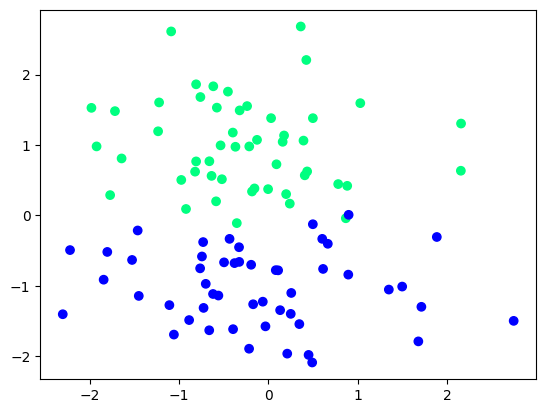

In [121]:
x,y  = make_classification(n_classes=2,n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,n_samples=100)
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter")
print("x and y shape :",x.shape,y.shape)

In [122]:
def step(x):
    return 1 if x > 0 else 0

def sigmoid(z):
    return 1/(1 + np.exp(-z))


def plot_boundary(x,y,weights):
    
    bias = weights[0] # C 
    w1, w2 = weights[1:] # A,B 

    plt.scatter(x[:,0],x[:,1],cmap="winter",s=100,c=y)
    x1_vals = np.linspace(-3 ,3, 100) # generate some poins int the range of data 
    pred = -(w1 * x1_vals + bias) / w2 # get values of y (Ax + By + C = 0) => (y = -(Ax + C)/B)
    plt.plot(x1_vals,pred,color="red")
    plt.show()
    

def generate_dummy(nums=100):
    v1 = np.linspace(-3, 3, 10) # cuz our data is from -3 to 3  , but u can take anything 
    v2 = np.linspace(-2, 2, 10)
    x1, x2 = np.meshgrid(v1, v2)

    # Combine into grid of points
    grid = np.c_[x1.ravel(), x2.ravel()]   
    return grid

In [ ]:

def perceptron(x,y,epochs=100,lr=0.01,activation="step"):
    activations_funcs = {"step":step,"sigmoid":sigmoid}
    
    x =  np.insert(x,0,1,axis=1)
    weights =  np.ones(x.shape[1])
    # bias  =  0
    
    
    for i in range(epochs):
        idx  =  np.random.randint(0,x.shape[0])
        y_hat =  activations_funcs[activation](np.dot(x[idx],weights))  
        weights +=  lr *np.dot((y[idx] - y_hat),x[idx])
        # bias +=  lr*(y[idx] - y_hat)
    
    return weights #,bias 

def predict(x_test,weights):
    pred =  np.dot(x_test,weights[1:]) + weights[0]
    return np.where(pred > 0,1,0)




#### Without Sigmoid 

R2 score : 0.8


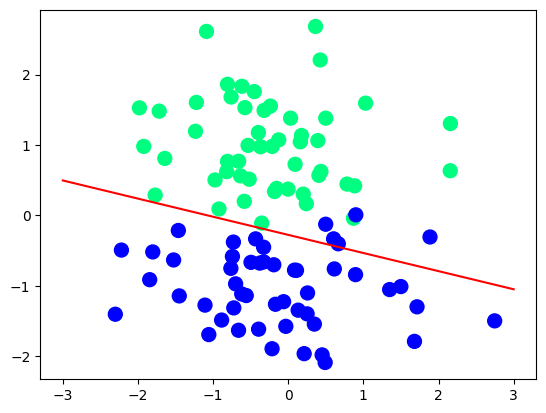

In [124]:
model_weights = perceptron(x,y,epochs=800)
y_pred = predict(x,model_weights)
r2  = r2_score(y,y_pred)
print("R2 score :",r2)
plot_boundary(x,y,model_weights)

#### With sigmoid 

R2 score : 0.8


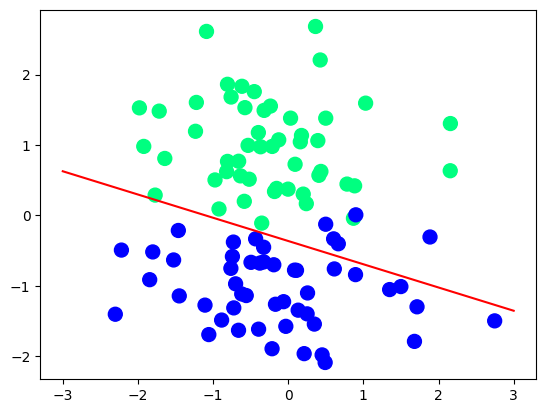

In [125]:
model_weights = perceptron(x,y,epochs=400,activation="sigmoid")
y_pred = predict(x,model_weights)
r2  = r2_score(y,y_pred)
print("R2 score :",r2)
plot_boundary(x,y,model_weights)

**SKLEARN MODEL**

R2 score : 0.92


<Axes: >

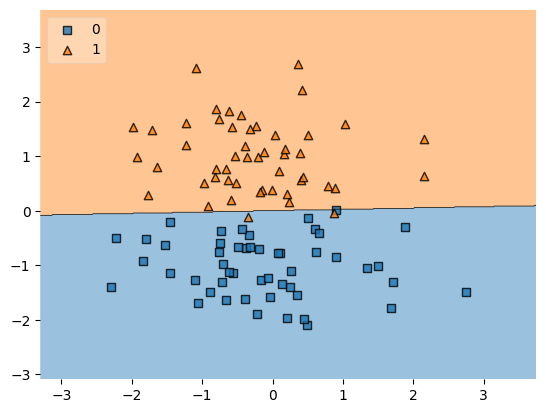

In [126]:
## works for both sigmoid and step , just for comparsionrewsaq
model =  Perceptron()
model.fit(x,y)
y_pred =  model.predict(x)
r2_  = r2_score(y,y_pred)
print("R2 score :",r2_)
plot_decision_regions(x,y,clf=model,legend=2)